# Comparison of streamflow modelling of choosen citites between a standard Long Short-Term Memory Network (LSTM) and a combined Convolutional Neuronal Network with Long Short-Term Memory Network (CNNLSTM)

### This notebooks reproduces the results related to the abstract "Vorhersage von Zeitreihen durch Nutzung von Machine Learning-Ansätzen am Beispiel einer Niederschlagabflussmodellierug"

### Polat, Kadir und Salhi, Hamza: "Vorhersage von Zeitreihen durch Nutzung von Machine Learning-Ansätzen am Beispiel einer Niederschlagabflussmodellierug"

## Setup
#### Librarys and seperated functions which are used in this Notebook. In getData the data for the considered basin is loaded. In preProcess all important preprocessing Steps like scaling, preparing an appropriate shape and at least shuffling the data are included. In model the concrete network architecture, the compilation and loss calculation is defined. In postProcess the Nash–Sutcliffe model efficiency coefficient is calculated as well as essential model parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts import getData
from scripts import preProcess  
from scripts import model 
from scripts import postProcess

# Download the dataset you need on following Websites
# Camels US Dataset: https://ral.ucar.edu/solutions/products/camels
# Daymet US Dataset: https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1840

## Cities

### In the following image the US clima map can be seen. Especially the cities Seattle/Eureka/Mesa which are considered for the streamflow prediction are marked in this map. 

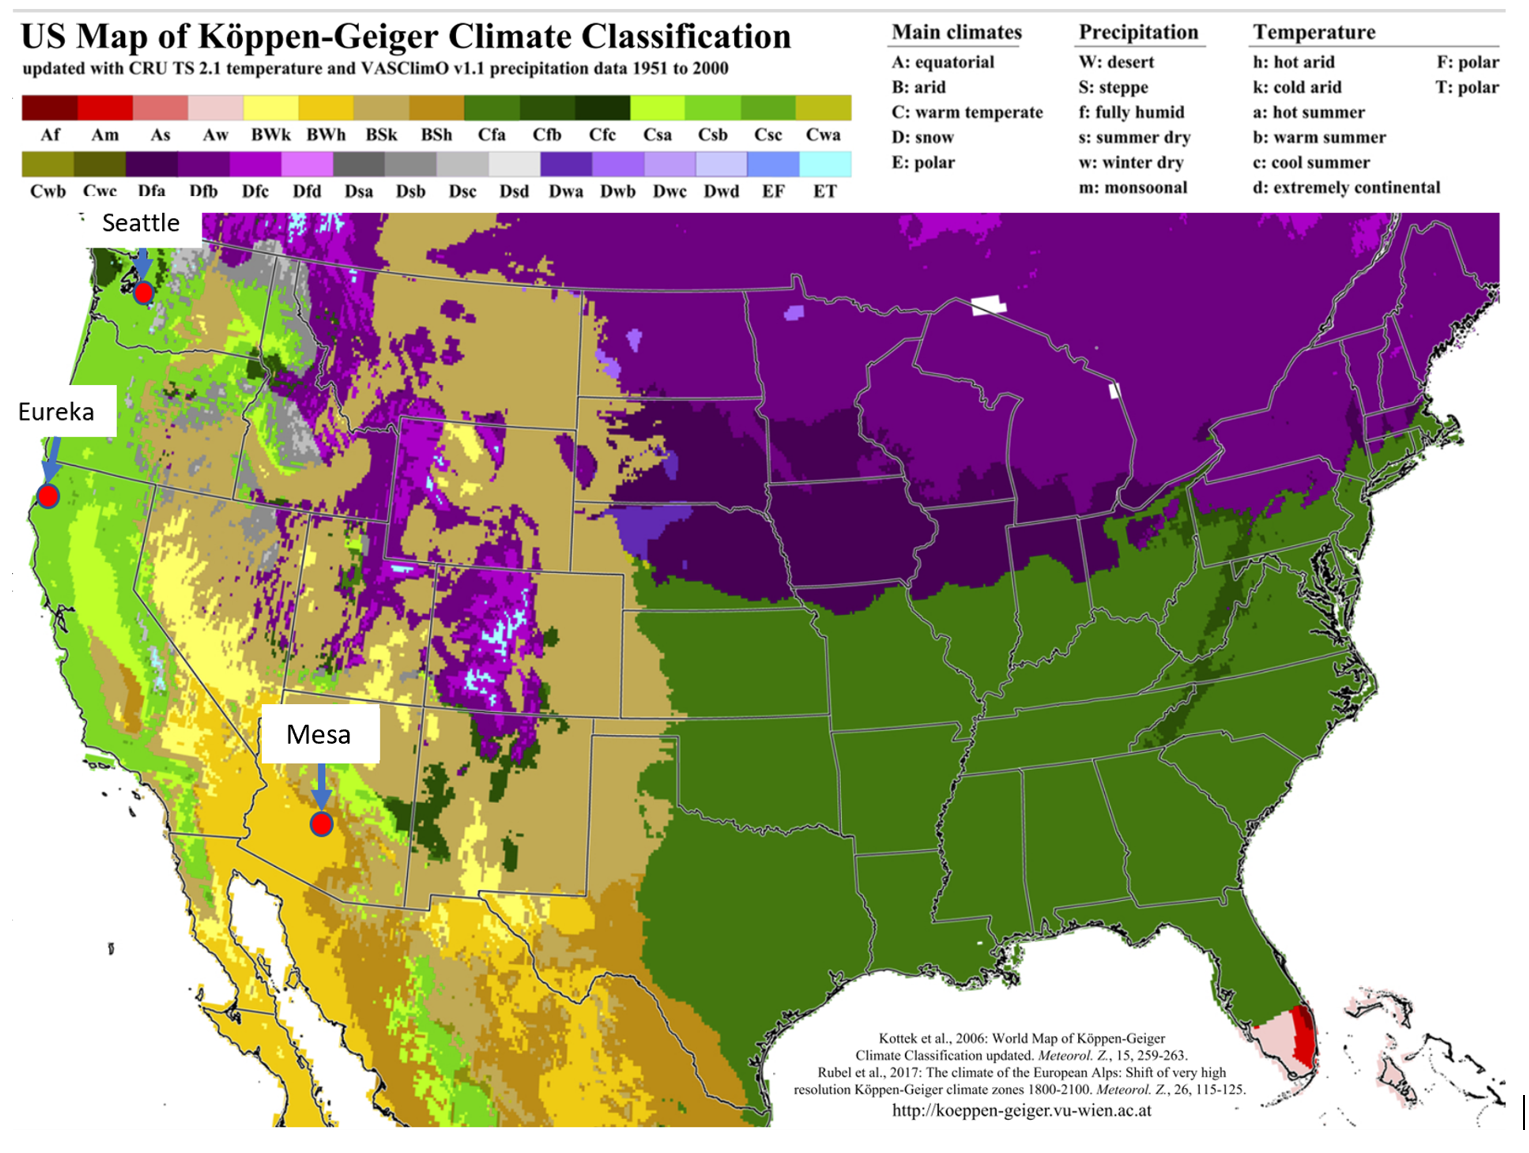

## Load Daymet Data for CNNLSTM
#### Loading the downloaded Daymet-US streamflow/forcing data and preprocess these. Daymet and Camels Dataset are differently build up. In this constellation the traindata includes 80% of the whole dataset. The evaluation and test dataset each include 10% of the whole dataset. In this case data from 1980 to 1990 is considered but can be changed by changing the start- and endyear variables. 30 days are used here to calculate the streamflow on day 30+1. Changing "days" for example to 50 would calculate the streamflow on day 50+1.

### Load Mesa Data

In [2]:
startyear=1980 # startyear
endyear=1990 # endyear
days=30 # days to consider


# Load Data
forcings_9494000,streamflow_9494000=getData.cnn_lstm_data(9494000,startyear, endyear)
forcings_9494000,streamflow_9494000 = preProcess.prepareData(forcings_9494000,streamflow_9494000,days)

# Traindata
forcings_9494000_train = forcings_9494000[:round(forcings_9494000.shape[0]*0.8)]
streamflow_9494000_train = streamflow_9494000[:round(streamflow_9494000.shape[0]*0.8)]
forcings_9494000_train, SF_forcings_9494000_train = preProcess.scale(forcings_9494000_train)
streamflow_9494000_train, SF_streamflow_9494000_train = preProcess.scale(streamflow_9494000_train)
forcings_9494000_train,streamflow_9494000_train = preProcess.shuffle(forcings_9494000_train,streamflow_9494000_train)

# Evaluationdata
forcings_9494000_eval= forcings_9494000[round(forcings_9494000.shape[0]*0.8):round(forcings_9494000.shape[0]*0.9)]
streamflow_9494000_eval= streamflow_9494000[round(streamflow_9494000.shape[0]*0.8):round(streamflow_9494000.shape[0]*0.9)]
forcings_9494000_eval, SF_forcings_9494000_eval = preProcess.scale(forcings_9494000_eval)
streamflow_9494000_eval, SF_streamflow_9494000_eval = preProcess.scale(streamflow_9494000_eval)

# Testdata
forcings_9494000_test= forcings_9494000[round(forcings_9494000.shape[0]*0.9):]
streamflow_9494000_test= streamflow_9494000[round(streamflow_9494000.shape[0]*0.9):]
forcings_9494000_test, SF_forcings_9494000_test = preProcess.scale(forcings_9494000_test)
streamflow_9494000_test, SF_streamflow_9494000_test = preProcess.scale(streamflow_9494000_test)

'forcings_11522500_test= forcings_11522500[round(forcings_11522500.shape[0]*0.9):]\nstreamflow_11522500_test= streamflow_11522500[round(streamflow_11522500.shape[0]*0.9):]\nforcings_11522500_test, SF_forcings_11522500_test = preProcess.scale(forcings_11522500_test)\nstreamflow_11522500_test, SF_streamflow_11522500_test = preProcess.scale(streamflow_11522500_test)\n#forcings_11522500_test,streamflow_11522500_test = preProcess.shuffle(forcings_11522500_test,streamflow_11522500_test)\n\nforcings_12189500_test= forcings_12189500[round(forcings_12189500.shape[0]*0.9):]\nstreamflow_12189500_test= streamflow_12189500[round(streamflow_12189500.shape[0]*0.9):]\nforcings_12189500_test, SF_forcings_12189500_test = preProcess.scale(forcings_12189500_test)\nstreamflow_12189500_test, SF_streamflow_12189500_test = preProcess.scale(streamflow_12189500_test)'

# Train CNN-LSTM Models
#### Get model architecture, compile model and calculate loss.  Afterwards model is evaluated and based on testdata  output values are predicted. As input the shape of the considered and prepared basin is expected. The shape for the CNN-LSTM model contains Timesteps, x_shape, y_shape and features in this order. The shape for the LSTM model contains timesteps and features in this order. The batchsize which is in this case 64 and the number of epochs which is 100 can be changed for each mdoel separately.


In [7]:
import tensorflow as tf

def myModel(days,x_shape,y_shape,features):    
    return tf.keras.Sequential([
        tf.keras.layers.TimeDistributed(
            tf.keras.layers.Conv2D(8,(3,3),strides=2,input_shape=(days,x_shape,y_shape,features))),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(4)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
        tf.keras.layers.LSTM(units=10,dropout=0.2),
        tf.keras.layers.Dense(units=1)
    ])

### Mesa CNNLSTM

Epoch 1/20
21/21 [==============================] - 6s 306ms/step - loss: 0.0335 - mean_squared_error: 0.0334 - mean_absolute_error: 0.1374 - val_loss: 0.0281 - val_mean_squared_error: 0.0246 - val_mean_absolute_error: 0.0984
Epoch 2/20
21/21 [==============================] - 6s 286ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - mean_absolute_error: 0.0855 - val_loss: 0.0265 - val_mean_squared_error: 0.0232 - val_mean_absolute_error: 0.0862
Epoch 3/20
21/21 [==============================] - 6s 287ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0679 - val_loss: 0.0275 - val_mean_squared_error: 0.0241 - val_mean_absolute_error: 0.0878
Epoch 4/20
21/21 [==============================] - 6s 287ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0564 - val_loss: 0.0286 - val_mean_squared_error: 0.0252 - val_mean_absolute_error: 0.0934
Epoch 5/20
21/21 [==============================] - 6s 286ms/step - loss: 0.0049 - mean_squared_

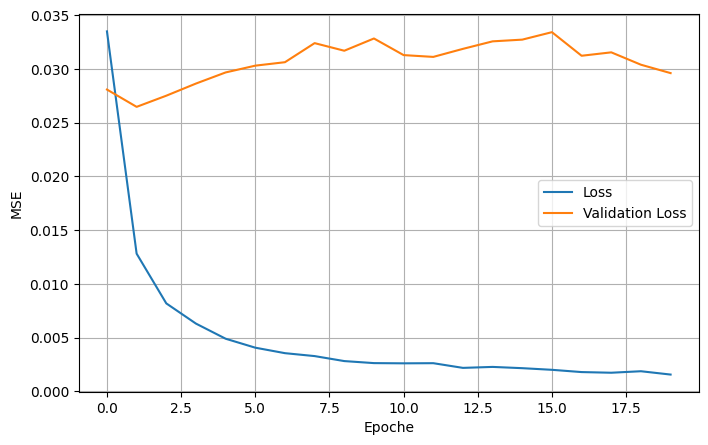

In [8]:
dnn_model_9494000 = myModel(forcings_9494000.shape[1],forcings_9494000.shape[2],forcings_9494000.shape[3],
                                       forcings_9494000.shape[4])

history = model.kompilierung(model=dnn_model_9494000, inputs=forcings_9494000_train, targets=streamflow_9494000_train,
                          validation=(forcings_9494000_eval, streamflow_9494000_eval), batch_size=128, epochs=20)

model.loss(history)


# Evaluierung und Speichern der Metriken
dnn_results_9494000 = dnn_model_9494000.evaluate(forcings_9494000_test, streamflow_9494000_test)
# Vorhersage der auf den Testdaten
y_predicted_9494000 = dnn_model_9494000.predict(forcings_9494000_test)


### Load Eureka Data

In [3]:
startyear=1980 # startyear
endyear=1990 # endyear
days=30 # days to consider
forcings_11522500,streamflow_11522500=getData.cnn_lstm_data(11522500,startyear, endyear)
forcings_11522500,streamflow_11522500 = preProcess.prepareData(forcings_11522500,streamflow_11522500,days)

forcings_11522500_train = forcings_11522500[:round(forcings_11522500.shape[0]*0.8)]
streamflow_11522500_train = streamflow_11522500[:round(streamflow_11522500.shape[0]*0.8)]
forcings_11522500_train, SF_forcings_11522500_train = preProcess.scale(forcings_11522500_train)
streamflow_11522500_train, SF_streamflow_11522500_train = preProcess.scale(streamflow_11522500_train)
forcings_11522500_train,streamflow_11522500_train = preProcess.shuffle(forcings_11522500_train,streamflow_11522500_train)

forcings_11522500_eval= forcings_11522500[round(forcings_11522500.shape[0]*0.8):round(forcings_11522500.shape[0]*0.9)]
streamflow_11522500_eval= streamflow_11522500[round(streamflow_11522500.shape[0]*0.8):round(streamflow_11522500.shape[0]*0.9)]
forcings_11522500_eval, SF_forcings_11522500_eval = preProcess.scale(forcings_11522500_eval)
streamflow_11522500_eval, SF_streamflow_11522500_eval = preProcess.scale(streamflow_11522500_eval)

forcings_11522500_test= forcings_11522500[round(forcings_11522500.shape[0]*0.9):]
streamflow_11522500_test= streamflow_11522500[round(streamflow_11522500.shape[0]*0.9):]
forcings_11522500_test, SF_forcings_11522500_test = preProcess.scale(forcings_11522500_test)
streamflow_11522500_test, SF_streamflow_11522500_test = preProcess.scale(streamflow_11522500_test)


### Eureka CNNLSTM

Epoch 1/20
21/21 [==============================] - 10s 496ms/step - loss: 0.0572 - mean_squared_error: 0.0571 - mean_absolute_error: 0.1814 - val_loss: 0.1125 - val_mean_squared_error: 0.1108 - val_mean_absolute_error: 0.3200
Epoch 2/20
21/21 [==============================] - 7s 349ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - mean_absolute_error: 0.1008 - val_loss: 0.0449 - val_mean_squared_error: 0.0447 - val_mean_absolute_error: 0.1827
Epoch 3/20
21/21 [==============================] - 7s 348ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0733 - val_loss: 0.0397 - val_mean_squared_error: 0.0390 - val_mean_absolute_error: 0.1763
Epoch 4/20
21/21 [==============================] - 7s 345ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0561 - val_loss: 0.0307 - val_mean_squared_error: 0.0302 - val_mean_absolute_error: 0.1535
Epoch 5/20
21/21 [==============================] - 7s 345ms/step - loss: 0.0048 - mean_squared

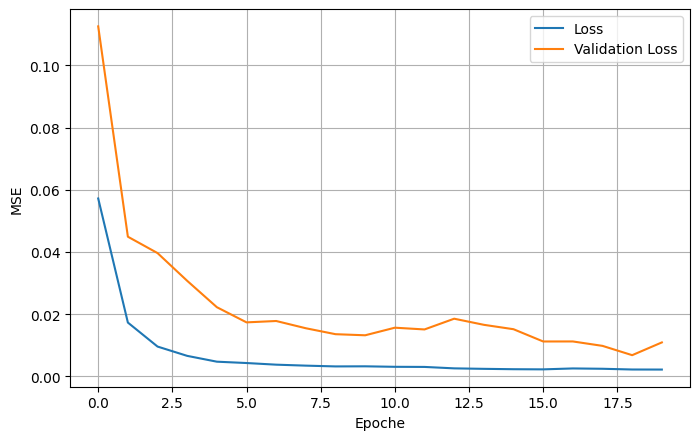

In [9]:
dnn_model_11522500 = myModel(forcings_11522500.shape[1],forcings_11522500.shape[2],forcings_11522500.shape[3],
                                        forcings_11522500.shape[4])

history = model.kompilierung(model=dnn_model_11522500, inputs=forcings_11522500_train, targets=streamflow_11522500_train,
                          validation=(forcings_11522500_eval, streamflow_11522500_eval), batch_size=128, epochs=20)

model.loss(history)


# Evaluierung und Speichern der Metriken
dnn_results_11522500 = dnn_model_11522500.evaluate(forcings_11522500_test, streamflow_11522500_test)
# Vorhersage der auf den Testdaten
y_predicted_11522500 = dnn_model_11522500.predict(forcings_11522500_test)

### Load Seattle Data

In [4]:
startyear=1980 # startyear
endyear=1990 # endyear
days=30 # days to consider
forcings_12189500,streamflow_12189500=getData.cnn_lstm_data(12189500,startyear, endyear)
forcings_12189500,streamflow_12189500 = preProcess.prepareData(forcings_12189500,streamflow_12189500,days)

forcings_12189500_train = forcings_12189500[:round(forcings_12189500.shape[0]*0.8)]
streamflow_12189500_train = streamflow_12189500[:round(streamflow_12189500.shape[0]*0.8)]
forcings_12189500_train, SF_forcings_12189500_train = preProcess.scale(forcings_12189500_train)
streamflow_12189500_train, SF_streamflow_12189500_train = preProcess.scale(streamflow_12189500_train)
forcings_12189500_train,streamflow_12189500_train = preProcess.shuffle(forcings_12189500_train,streamflow_12189500_train)

forcings_12189500_eval= forcings_12189500[round(forcings_12189500.shape[0]*0.8):round(forcings_12189500.shape[0]*0.9)]
streamflow_12189500_eval= streamflow_12189500[round(streamflow_12189500.shape[0]*0.8):round(streamflow_12189500.shape[0]*0.9)]
forcings_12189500_eval, SF_forcings_12189500_eval = preProcess.scale(forcings_12189500_eval)
streamflow_12189500_eval, SF_streamflow_12189500_eval = preProcess.scale(streamflow_12189500_eval)


forcings_12189500_test= forcings_12189500[round(forcings_12189500.shape[0]*0.9):]
streamflow_12189500_test= streamflow_12189500[round(streamflow_12189500.shape[0]*0.9):]
forcings_12189500_test, SF_forcings_12189500_test = preProcess.scale(forcings_12189500_test)
streamflow_12189500_test, SF_streamflow_12189500_test = preProcess.scale(streamflow_12189500_test)

### Seattle CNNLSTM

Epoch 1/20
21/21 [==============================] - 8s 362ms/step - loss: 0.0408 - mean_squared_error: 0.0407 - mean_absolute_error: 0.1515 - val_loss: 0.0565 - val_mean_squared_error: 0.0660 - val_mean_absolute_error: 0.1891
Epoch 2/20
21/21 [==============================] - 7s 333ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - mean_absolute_error: 0.0823 - val_loss: 0.0381 - val_mean_squared_error: 0.0415 - val_mean_absolute_error: 0.1623
Epoch 3/20
21/21 [==============================] - 7s 332ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0684 - val_loss: 0.0362 - val_mean_squared_error: 0.0357 - val_mean_absolute_error: 0.1562
Epoch 4/20
21/21 [==============================] - 7s 333ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0600 - val_loss: 0.0331 - val_mean_squared_error: 0.0302 - val_mean_absolute_error: 0.1386
Epoch 5/20
21/21 [==============================] - 7s 330ms/step - loss: 0.0053 - mean_squared_

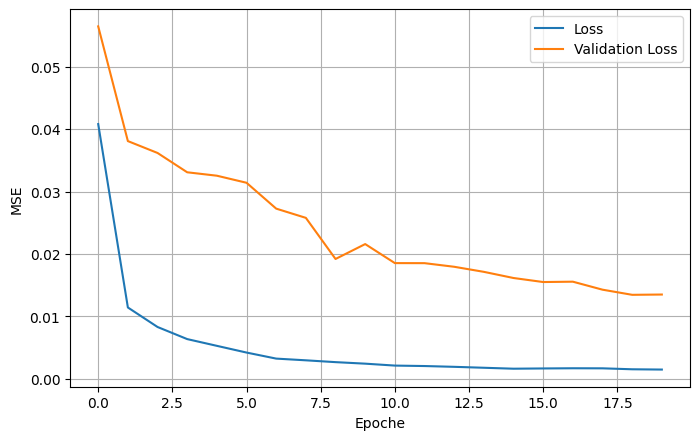

In [12]:
dnn_model_12189500 = myModel(forcings_12189500.shape[1],forcings_12189500.shape[2],forcings_12189500.shape[3],
                                        forcings_12189500.shape[4])

history = model.kompilierung(model=dnn_model_12189500, inputs=forcings_12189500_train, targets=streamflow_12189500_train,
                          validation=(forcings_12189500_eval, streamflow_12189500_eval), batch_size=128, epochs=20)

model.loss(history)


# Evaluierung und Speichern der Metriken
dnn_results_12189500 = dnn_model_12189500.evaluate(forcings_12189500_test, streamflow_12189500_test)
# Vorhersage der auf den Testdaten
y_predicted_12189500 = dnn_model_12189500.predict(forcings_12189500_test)


## Load Camels US Dataset for LSTM
#### Loading the downloaded Camels-US  streamflow/forcing data and preprocess these. Daymet and Camels Dataset are differently build up. In this constellation the traindata includes 80% of the whole dataset. The evaluation and test dataset each include 10% of the whole dataset. In this case data from 1980 to 1990 is considered but can be changed by changing the start- and endyear variables. 30 days are used here to calculate the streamflow on day 30+1. Changing "days" for example to 50 would calculate the streamflow on day 50+1.

In [13]:
basin = ["09494000","11522500","12189500"] # Areas to consider

start_date="80-01-01" # startdate: YY-MM-DD
end_date="90-12-31" # enddate: YY-MM-DD
days=30 # Days to consider

forcing,streamflow = getData.lstm_data(basin,start_date, end_date,days) # load data 
forcing_LSTM_9494000,streamflow_LSTM_9494000=preProcess.prepareTensor(forcing[0],streamflow[0],days)
forcing_LSTM_11522500,streamflow_LSTM_11522500 = preProcess.prepareTensor(forcing[1],streamflow[1],days)
forcing_LSTM_12189500,streamflow_LSTM_12189500 = preProcess.prepareTensor(forcing[2],streamflow[2],days)


# Traindata
forcing_LSTM_9494000_train = forcing_LSTM_9494000[:round(len(forcing_LSTM_9494000)*0.8)]
streamflow_LSTM_9494000_train = streamflow_LSTM_9494000[:round(len(streamflow_LSTM_9494000)*0.8)]
forcing_LSTM_9494000_train, SF_LSTM_forcing_9494000_train = preProcess.scale(forcing_LSTM_9494000_train)
streamflow_LSTM_9494000_train, SF_LSTM_streamflow_9494000_train = preProcess.scale(streamflow_LSTM_9494000_train)
forcing_LSTM_9494000_train,streamflow_LSTM_9494000_train = preProcess.shuffle(forcing_LSTM_9494000_train,streamflow_LSTM_9494000_train)

forcing_LSTM_11522500_train = forcing_LSTM_11522500[:round(len(forcing_LSTM_11522500)*0.8)]
streamflow_LSTM_11522500_train = streamflow_LSTM_11522500[:round(len(streamflow_LSTM_11522500)*0.8)]
forcing_LSTM_11522500_train, SF_LSTM_forcing_11522500_train = preProcess.scale(forcing_LSTM_11522500_train)
streamflow_LSTM_11522500_train, SF_LSTM_streamflow_11522500_train = preProcess.scale(streamflow_LSTM_11522500_train)
forcing_LSTM_11522500_train,streamflow_LSTM_11522500_train = preProcess.shuffle(forcing_LSTM_11522500_train,streamflow_LSTM_11522500_train)

forcing_LSTM_12189500_train = forcing_LSTM_12189500[:round(len(forcing_LSTM_12189500)*0.8)]
streamflow_LSTM_12189500_train = streamflow_LSTM_12189500[:round(len(streamflow_LSTM_12189500)*0.8)]
forcing_LSTM_12189500_train, SF_LSTM_forcing_12189500_train = preProcess.scale(forcing_LSTM_12189500_train)
streamflow_LSTM_12189500_train, SF_LSTM_streamflow_12189500_train = preProcess.scale(streamflow_LSTM_12189500_train)
forcing_LSTM_12189500_train,streamflow_LSTM_12189500_train = preProcess.shuffle(forcing_LSTM_12189500_train,streamflow_LSTM_12189500_train)

# Evaldata
forcing_LSTM_9494000_eval= forcing_LSTM_9494000[round(len(forcing_LSTM_9494000)*0.8):round(len(forcing_LSTM_9494000)*0.9)]
streamflow_LSTM_9494000_eval= streamflow_LSTM_9494000[round(len(streamflow_LSTM_9494000)*0.8):round(len(streamflow_LSTM_9494000)*0.9)]
forcing_LSTM_9494000_eval, SF_LSTM_forcing_9494000_eval = preProcess.scale(forcing_LSTM_9494000_eval)
streamflow_LSTM_9494000_eval, SF_LSTM_streamflow_9494000_eval = preProcess.scale(streamflow_LSTM_9494000_eval)
forcing_LSTM_9494000_eval,streamflow_LSTM_9494000_eval = preProcess.shuffle(forcing_LSTM_9494000_eval,streamflow_LSTM_9494000_eval)

forcing_LSTM_11522500_eval= forcing_LSTM_11522500[round(len(forcing_LSTM_11522500)*0.8):round(len(forcing_LSTM_11522500)*0.9)]
streamflow_LSTM_11522500_eval= streamflow_LSTM_11522500[round(len(streamflow_LSTM_11522500)*0.8):round(len(streamflow_LSTM_11522500)*0.9)]
forcing_LSTM_11522500_eval, SF_LSTM_forcing_11522500_eval = preProcess.scale(forcing_LSTM_11522500_eval)
streamflow_LSTM_11522500_eval, SF_LSTM_streamflow_11522500_eval = preProcess.scale(streamflow_LSTM_11522500_eval)
forcing_LSTM_11522500_eval,streamflow_LSTM_11522500_eval = preProcess.shuffle(forcing_LSTM_11522500_eval,streamflow_LSTM_11522500_eval)

forcing_LSTM_12189500_eval= forcing_LSTM_12189500[round(len(forcing_LSTM_12189500)*0.8):round(len(forcing_LSTM_12189500)*0.9)]
streamflow_LSTM_12189500_eval= streamflow_LSTM_12189500[round(len(streamflow_LSTM_12189500)*0.8):round(len(streamflow_LSTM_12189500)*0.9)]
forcing_LSTM_12189500_eval, SF_LSTM_forcing_12189500_eval = preProcess.scale(forcing_LSTM_12189500_eval)
streamflow_LSTM_12189500_eval, SF_LSTM_streamflow_12189500_eval = preProcess.scale(streamflow_LSTM_12189500_eval)
forcing_LSTM_12189500_eval,streamflow_LSTM_12189500_eval = preProcess.shuffle(forcing_LSTM_12189500_eval,streamflow_LSTM_12189500_eval)

# Testdata
forcing_LSTM_9494000_test= forcing_LSTM_9494000[round(len(forcing_LSTM_9494000)*0.9):]
streamflow_LSTM_9494000_test= streamflow_LSTM_9494000[round(len(streamflow_LSTM_9494000)*0.9):]
forcing_LSTM_9494000_test, SF_LSTM_forcing_9494000_test = preProcess.scale(forcing_LSTM_9494000_test)
streamflow_LSTM_9494000_test, SF_LSTM_streamflow_9494000_test = preProcess.scale(streamflow_LSTM_9494000_test)
forcing_LSTM_9494000_test,streamflow_LSTM_9494000_test = preProcess.shuffle(forcing_LSTM_9494000_test,streamflow_LSTM_9494000_test)

forcing_LSTM_11522500_test= forcing_LSTM_11522500[round(len(forcing_LSTM_11522500)*0.9):]
streamflow_LSTM_11522500_test= streamflow_LSTM_11522500[round(len(streamflow_LSTM_11522500)*0.9):]
forcing_LSTM_11522500_test, SF_LSTM_forcing_11522500_test = preProcess.scale(forcing_LSTM_11522500_test)
streamflow_LSTM_11522500_test, SF_LSTM_streamflow_11522500_test = preProcess.scale(streamflow_LSTM_11522500_test)
forcing_LSTM_11522500_test,streamflow_LSTM_11522500_test = preProcess.shuffle(forcing_LSTM_11522500_test,streamflow_LSTM_11522500_test)

forcing_LSTM_12189500_test= forcing_LSTM_12189500[round(len(forcing_LSTM_12189500)*0.9):]
streamflow_LSTM_12189500_test= streamflow_LSTM_12189500[round(len(streamflow_LSTM_12189500)*0.9):]
forcing_LSTM_12189500_test, SF_LSTM_forcing_12189500_test = preProcess.scale(forcing_LSTM_12189500_test)
streamflow_LSTM_12189500_test, SF_LSTM_streamflow_12189500_test = preProcess.scale(streamflow_LSTM_12189500_test)
forcing_LSTM_12189500_test,streamflow_LSTM_12189500_test = preProcess.shuffle(forcing_LSTM_12189500_test,streamflow_LSTM_12189500_test)


### Mesa LSTM

Epoch 1/20
25/25 [==============================] - 1s 28ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0394 - val_loss: 0.0349 - val_mean_squared_error: 0.0362 - val_mean_absolute_error: 0.1017
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0340 - val_loss: 0.0345 - val_mean_squared_error: 0.0358 - val_mean_absolute_error: 0.1013
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0333 - val_loss: 0.0337 - val_mean_squared_error: 0.0350 - val_mean_absolute_error: 0.0999
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0310 - val_loss: 0.0329 - val_mean_squared_error: 0.0341 - val_mean_absolute_error: 0.0990
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_squared_error: 0.

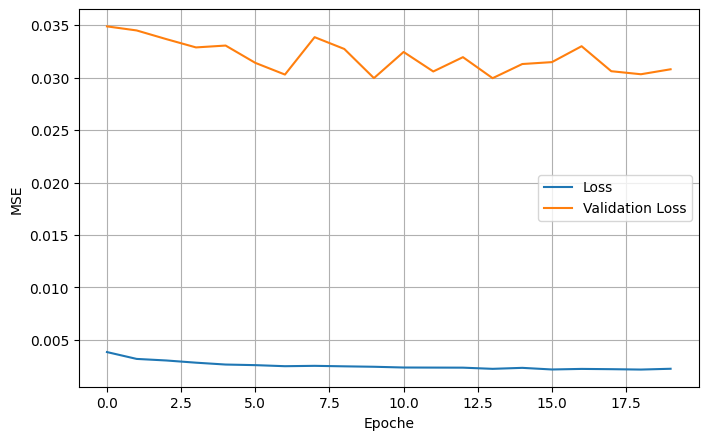

In [20]:
dnn_model_LSTM_9494000 = model.model_LSTM(forcing_LSTM_9494000.shape[1],forcing_LSTM_9494000.shape[2])

# Bauen und Trainieren des NNs
history = model.kompilierung(model=dnn_model_LSTM_9494000, inputs=forcing_LSTM_9494000_train, targets=streamflow_LSTM_9494000_train,
                          validation=(forcing_LSTM_9494000_eval, streamflow_LSTM_9494000_eval), batch_size=128, epochs=20)

model.loss(history)


# Evaluierung und Speichern der Metriken
result_9494000_LSTM = dnn_model_LSTM_9494000.evaluate(forcing_LSTM_9494000_test, streamflow_LSTM_9494000_test)
# Vorhersage der auf den Testdaten
y_predicted_9494000_LSTM = dnn_model_LSTM_9494000.predict(forcing_LSTM_9494000_test)

### Eureka LSTM

Epoch 1/20
25/25 [==============================] - 1s 31ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0608 - val_loss: 0.0203 - val_mean_squared_error: 0.0201 - val_mean_absolute_error: 0.0850
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0437 - val_loss: 0.0187 - val_mean_squared_error: 0.0185 - val_mean_absolute_error: 0.0736
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0384 - val_loss: 0.0186 - val_mean_squared_error: 0.0185 - val_mean_absolute_error: 0.0755
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0375 - val_loss: 0.0187 - val_mean_squared_error: 0.0186 - val_mean_absolute_error: 0.0763
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_squared_error: 0.

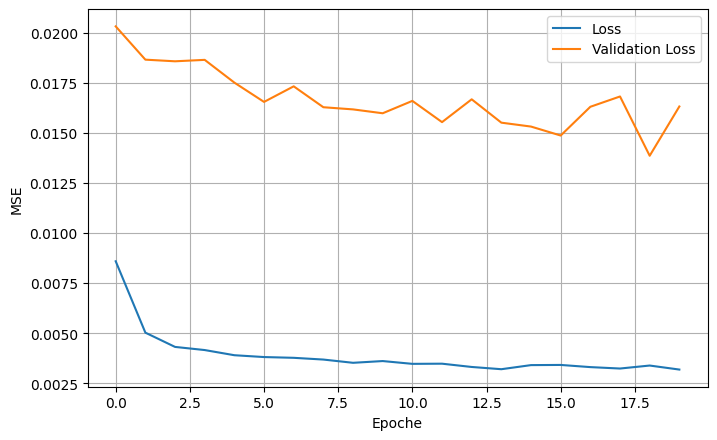

In [27]:
dnn_model_LSTM_11522500 = model.model_LSTM(forcing_LSTM_11522500.shape[1],forcing_LSTM_11522500.shape[2])
# Bauen und Trainieren des NNs
history = model.kompilierung(model=dnn_model_LSTM_11522500, inputs=forcing_LSTM_11522500_train, targets=streamflow_LSTM_11522500_train,
                          validation=(forcing_LSTM_11522500_eval, streamflow_LSTM_11522500_eval), batch_size=128, epochs=20)

model.loss(history)


# Evaluierung und Speichern der Metriken
result_11522500_LSTM = dnn_model_LSTM_11522500.evaluate(forcing_LSTM_11522500_test, streamflow_LSTM_11522500_test)
# Vorhersage der auf den Testdaten
y_predicted_11522500_LSTM = dnn_model_LSTM_11522500.predict(forcing_LSTM_11522500_test)


### Seattle LSTM

Epoch 1/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0693 - val_loss: 0.0126 - val_mean_squared_error: 0.0122 - val_mean_absolute_error: 0.0730
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0448 - val_loss: 0.0131 - val_mean_squared_error: 0.0122 - val_mean_absolute_error: 0.0698
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0372 - val_loss: 0.0132 - val_mean_squared_error: 0.0121 - val_mean_absolute_error: 0.0678
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0340 - val_loss: 0.0131 - val_mean_squared_error: 0.0118 - val_mean_absolute_error: 0.0654
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0025 - mean_squared_error: 0.

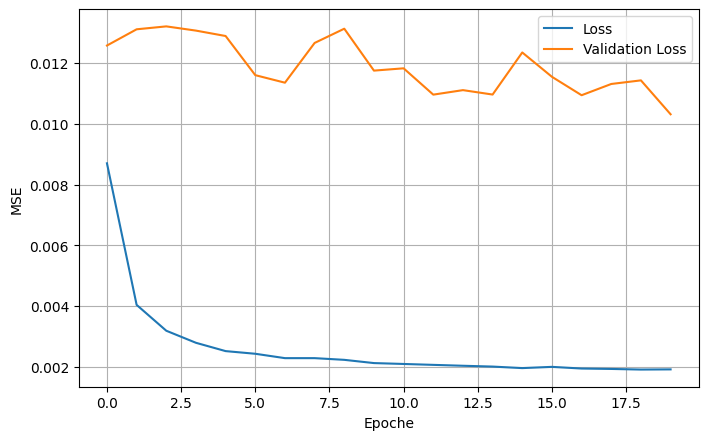

In [26]:
dnn_model_LSTM_12189500 = model.model_LSTM(forcing_LSTM_12189500.shape[1],forcing_LSTM_12189500.shape[2])

# Bauen und Trainieren des NNs
history = model.kompilierung(model=dnn_model_LSTM_12189500, inputs=forcing_LSTM_12189500_train, targets=streamflow_LSTM_12189500_train,
                          validation=(forcing_LSTM_12189500_eval, streamflow_LSTM_12189500_eval), batch_size=128, epochs=20)

model.loss(history)


# Evaluierung und Speichern der Metriken
result_12189500_LSTM = dnn_model_LSTM_12189500.evaluate(forcing_LSTM_12189500_test, streamflow_LSTM_12189500_test)
# Vorhersage der auf den Testdaten
y_predicted_12189500_LSTM = dnn_model_LSTM_12189500.predict(forcing_LSTM_12189500_test)


## Comparison of Nash–Sutcliffe model efficiency coefficient

Text(0.5, 1.0, 'Comparing of NSE value between LSTM and CNN-LSTM Models')

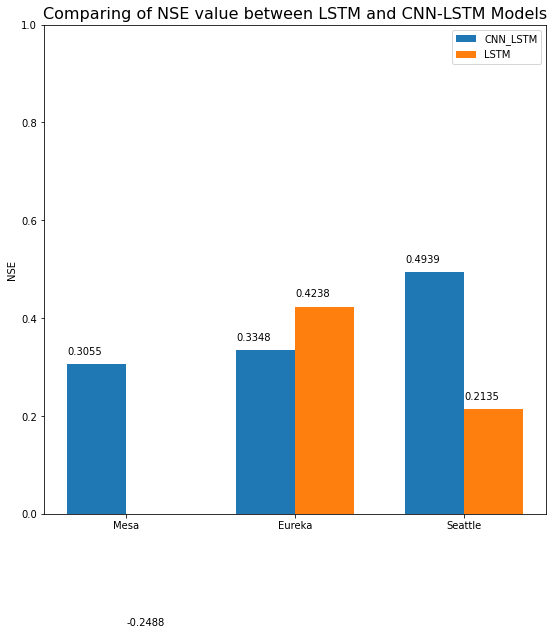

In [28]:
# NSE Berechnung

index=["Mesa","Eureka","Seattle"]

# CNNLSTM NSE
y_predicted_9494000_shaped=np.reshape(y_predicted_9494000,(y_predicted_9494000.shape[0],y_predicted_9494000.shape[1])) #Mesa
nse_9494000 = postProcess.nse(y_predicted_9494000_shaped, streamflow_9494000_test)#Mesa

y_predicted_11522500_shaped=np.reshape(y_predicted_11522500,(y_predicted_11522500.shape[0],y_predicted_11522500.shape[1]))#Eureka
nse_11522500 = postProcess.nse(y_predicted_11522500_shaped, streamflow_11522500_test)#Eureka

y_predicted_12189500_shaped=np.reshape(y_predicted_12189500,(y_predicted_12189500.shape[0],y_predicted_12189500.shape[1]))#Seattle
nse_12189500 = postProcess.nse(y_predicted_12189500_shaped, streamflow_12189500_test)#Seattle

# LSTM NSE
nse_9494000_LSTM = postProcess.nse(y_predicted_9494000_LSTM, streamflow_LSTM_9494000_test)#Mesa
nse_11522500_LSTM= postProcess.nse(y_predicted_11522500_LSTM, streamflow_LSTM_11522500_test)#Eureka
nse_12189500_LSTM = postProcess.nse(y_predicted_12189500_LSTM, streamflow_LSTM_12189500_test)#Seattle

nse_CNNLSTM = [nse_9494000,nse_11522500,nse_12189500]
nse_LSTM=[nse_9494000_LSTM,nse_11522500_LSTM,nse_12189500_LSTM]
x = np.arange(len(index)) 
width = 0.35 
fig, ax = plt.subplots(figsize=(9,9))
ax.bar(x , nse_CNNLSTM, width, label='CNN_LSTM')
ax.bar(x+width , nse_LSTM, width, label='LSTM')
ax.set_xticks(x+width/2)
ax.set_xticklabels(index)
plt.ylim(0,1)
for ind, value in enumerate(nse_CNNLSTM):
    plt.text(ind-width/2, value+0.02, str(round(value,4)))
for ind, value in enumerate(nse_LSTM):
    plt.text(ind+width/2, value+0.02, str(round(value,4)))
ax.legend()
plt.ylabel('NSE')
plt.title('Comparing of NSE value between LSTM and CNN-LSTM Models',fontsize=16)

## Comparison of real and predicted Streamflow

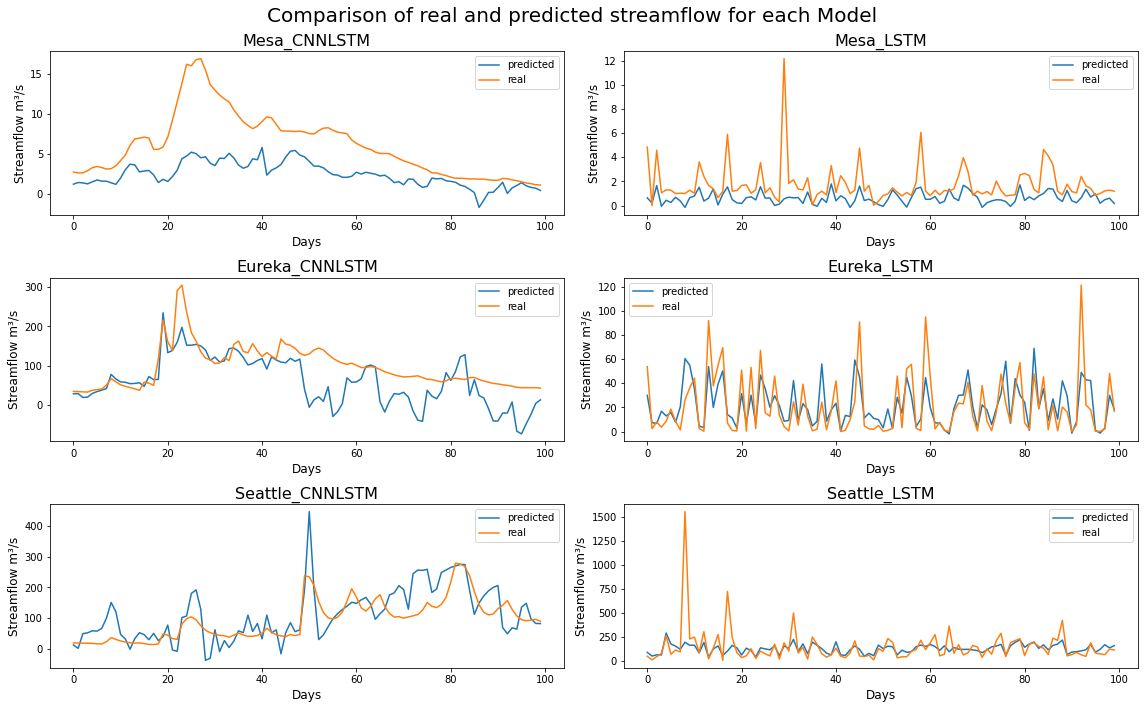

In [29]:
#CNNLSTM rescale Streamflow
y_9494000_simulated_real=y_predicted_9494000*SF_streamflow_9494000_test[0]
streamflow_9494000_test_real=streamflow_9494000_test*SF_streamflow_9494000_test[0]
y_11522500_simulated_real=y_predicted_11522500*SF_streamflow_11522500_test[0]
streamflow_11522500_test_real=streamflow_11522500_test*SF_streamflow_11522500_test[0]
y_12189500_simulated_real=y_predicted_12189500*SF_streamflow_12189500_test[0]
streamflow_12189500_test_real=streamflow_12189500_test*SF_streamflow_12189500_test[0]

#LSTM rescale Streamflow
y_9494000_LSTM_simulated=y_predicted_9494000_LSTM*SF_LSTM_streamflow_9494000_test
y_11522500_LSTM_simulated=y_predicted_11522500_LSTM*SF_LSTM_streamflow_11522500_test
y_12189500_LSTM_simulated=y_predicted_12189500_LSTM*SF_LSTM_streamflow_12189500_test
y_9494000_LSTM_real=streamflow_LSTM_9494000_test*SF_LSTM_streamflow_9494000_test
y_11522500_LSTM_real=streamflow_LSTM_11522500_test*SF_LSTM_streamflow_11522500_test
y_12189500_LSTM_real=streamflow_LSTM_12189500_test*SF_LSTM_streamflow_12189500_test


def xvalue(length):
    x =[]
    for i in range(length):
        x.append(i)
    return x
x_val = xvalue(y_9494000_simulated_real.shape[0])
x_50_val = xvalue(len(y_9494000_LSTM_simulated))

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(16,10))

# CNNLSTM Plot
ax1.plot(x_val[:100], y_9494000_simulated_real[:100], label="predicted") # Mesa
ax1.plot(x_val[:100], streamflow_9494000_test_real[:100], label="real")# Mesa
ax3.plot(x_val[:100], y_11522500_simulated_real[:100], label="predicted") #Eureka
ax3.plot(x_val[:100], streamflow_11522500_test_real[:100], label="real")#Eureka
ax5.plot(x_val[:100], y_12189500_simulated_real[:100], label="predicted")# Seattle
ax5.plot(x_val[:100], streamflow_12189500_test_real[:100], label="real")# Seattle
# CNNLSTM Title + Legend
ax1.legend(),ax1.set_title("Mesa_CNNLSTM", fontsize=16)
ax3.legend(),ax3.set_title("Eureka_CNNLSTM", fontsize=16)
ax5.legend(),ax5.set_title("Seattle_CNNLSTM", fontsize=16)

ax2.plot(x_50_val[:100], y_9494000_LSTM_simulated[:100], label="predicted")# Mesa
ax2.plot(x_50_val[:100], y_9494000_LSTM_real[:100], label="real")# Mesa
ax4.plot(x_50_val[:100], y_11522500_LSTM_simulated[:100], label="predicted")#Eureka
ax4.plot(x_50_val[:100], y_11522500_LSTM_real[:100], label="real")#Eureka
ax6.plot(x_50_val[:100], y_12189500_LSTM_simulated[:100], label="predicted") # Seattle
ax6.plot(x_50_val[:100], y_12189500_LSTM_real[:100], label="real")# Seattle
# LSTM Title + Legend
ax2.legend(),ax2.set_title("Mesa_LSTM", fontsize=16)
ax4.legend(),ax4.set_title("Eureka_LSTM", fontsize=16)
ax6.legend(),ax6.set_title("Seattle_LSTM", fontsize=16)

# Axes label
plt.suptitle('Comparison of real and predicted streamflow for each Model',fontsize=20)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
for ax in axes:
    ax.set_xlabel('Days', fontsize=12)
    ax.set_ylabel('Streamflow m³/s', fontsize=12)
plt.tight_layout()
